# Esta cosa es para analizar una base de datos de Airbnb

Primero descargamos las librerias o activamos el .venv

~ #source .venv/bin/activate

~ #pip install []

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('listings.csv')
columns = data.columns.size
rows = len(data)

print(columns, rows)

79 26067


In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250319150644,2025-03-21,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250319150644,2025-03-20,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.47,NaN,f,9,4,2,0,0.40
2,56074,https://www.airbnb.com/rooms/56074,20250319150644,2025-03-20,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,4.94,4.76,4.79,NaN,f,1,1,0,0,0.49
3,67703,https://www.airbnb.com/rooms/67703,20250319150644,2025-03-20,previous scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.31
4,70644,https://www.airbnb.com/rooms/70644,20250319150644,2025-03-22,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.83


In [5]:
print(data.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'source' 'name'
 'description' 'neighborhood_overview' 'picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'neighbourhood' 'neighbourhood_cleansed' 'neighbourhood_group_cleansed'
 'latitude' 'longitude' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bathrooms_text' 'bedrooms' 'beds' 'amenities' 'price'
 'minimum_nights' 'maximum_nights' 'minimum_minimum_nights'
 'maximum_minimum_nights' 'minimum_maximum_nights'
 'maximum_maximum_nights' 'minimum_nights_avg_ntm'
 'maximum_nights_avg_ntm' 'calendar_updated' 'has_availability'
 'availability_30' 'availability_60' 'availability_90' 'availability_365'
 'calendar_last_scraped' 'numbe

# Actividad

Obtener:

* mean price
* room_type más común
* 10 alcaldias con más alojamiento
* Las 10 personas con más alojamientos (host_name)

## Precio promedio

In [6]:
# Visualizamos los valores de la columna
data['price']

0        $3,982.00
1              NaN
2          $585.00
3              NaN
4        $1,015.00
           ...    
26062      $529.00
26063      $472.00
26064      $399.00
26065    $1,494.00
26066    $1,722.00
Name: price, Length: 26067, dtype: object

In [7]:
#Eliminar valores nulos
data = data.dropna(subset=['price'])

data['price']

0        $3,982.00
2          $585.00
4        $1,015.00
6        $3,982.00
7          $327.00
           ...    
26062      $529.00
26063      $472.00
26064      $399.00
26065    $1,494.00
26066    $1,722.00
Name: price, Length: 22068, dtype: object

In [8]:
#Limpiar $ , de los precios
data['price'] = data['price'].str.replace('$', '').str.replace(',', '')
data['price']

0        3982.00
2         585.00
4        1015.00
6        3982.00
7         327.00
          ...   
26062     529.00
26063     472.00
26064     399.00
26065    1494.00
26066    1722.00
Name: price, Length: 22068, dtype: object

In [9]:
#Convertir str a float
data['price'] = data['price'].astype(float)
data['price']

0        3982.0
2         585.0
4        1015.0
6        3982.0
7         327.0
          ...  
26062     529.0
26063     472.0
26064     399.0
26065    1494.0
26066    1722.0
Name: price, Length: 22068, dtype: float64

In [10]:
promedioPrem = data['price'].mean()
print("El precio promedio de una noche es: $", promedioPrem.round(2))

El precio promedio de una noche es: $ 1665.01


## Tipo de habitación más común

In [11]:
data['room_type']

0        Entire home/apt
2        Entire home/apt
4        Entire home/apt
6        Entire home/apt
7           Private room
              ...       
26062        Shared room
26063       Private room
26064       Private room
26065    Entire home/apt
26066    Entire home/apt
Name: room_type, Length: 22068, dtype: object

In [12]:
data['room_type'].value_counts().head(1)

room_type
Entire home/apt    14843
Name: count, dtype: int64

Text(0.5, 1.0, 'Tipos de habitación')

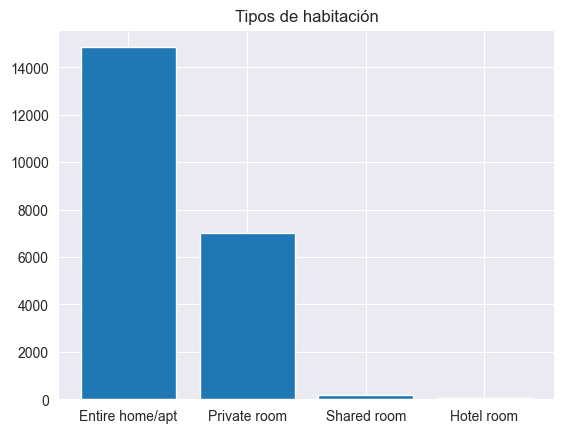

In [13]:
data['room_type'].value_counts().head()
#Graficamos los tipos de habitación
figHab, axHab = plt.subplots()
axHab.bar(data['room_type'].value_counts().head().index, data['room_type'].value_counts().head().values)
axHab.set_title("Tipos de habitación")

Graficando los datos nos podemos dar cuenta de que el principal tipo de habitación son casas y departamentos completos, seguido por la renta de cuartos individuales.

## 10 alcaldías con más alojamiento

In [14]:
data = data.dropna(subset=['host_neighbourhood'])

In [15]:
data['host_neighbourhood'].value_counts().head(10)

host_neighbourhood
Polanco                                    1487
Roma Norte                                 1002
Condesa                                     645
Chapultepec Morales                         605
Centro Histórico de la Ciudad de México     460
Hipódromo                                   368
Colonia Cuauhtémoc                          364
Colonia Centro                              356
Centro Histórico                            310
Coapa                                       224
Name: count, dtype: int64

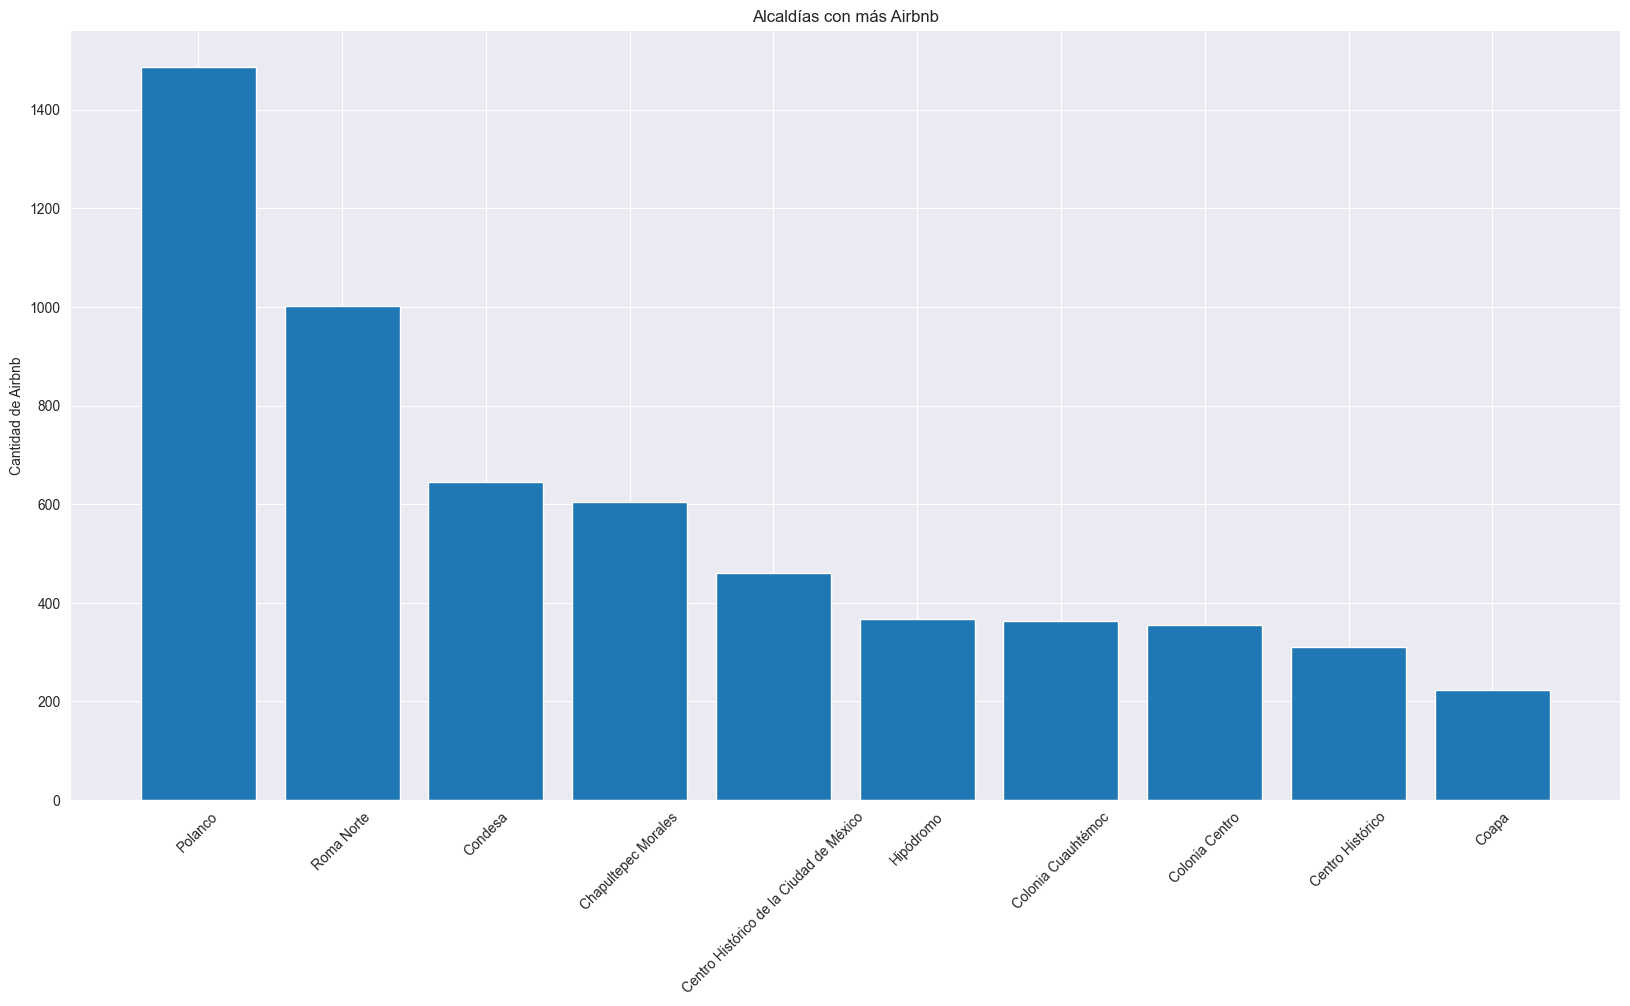

In [16]:
plt.figure(figsize = (20,10))
plt.bar(data['host_neighbourhood'].value_counts().head(10).index, data['host_neighbourhood'].value_counts().head(10).values)
plt.title('Alcaldías con más Airbnb')
plt.ylabel('Cantidad de Airbnb')
plt.xticks(rotation = 45)
plt.show()

## Las 10 personas con más alojamientos

In [17]:
data['host_name'].value_counts().head(10)

host_name
Blueground    225
Juan          207
Mr. W         201
Capitalia     154
Alejandra     141
Luis          137
Alejandro     135
Andrea        118
Eduardo       108
HOMi          105
Name: count, dtype: int64

Text(0.5, 1.0, 'Personas con más Airbnbs')

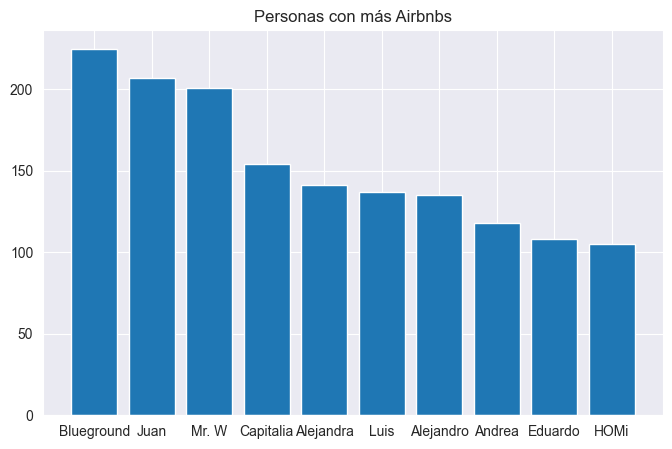

In [18]:
figPer, axPer = plt.subplots(figsize=(8, 5))
axPer.bar(data['host_name'].value_counts().head(10).index, data['host_name'].value_counts().head(10).values)
axPer.set_title("Personas con más Airbnbs")

### Segunda parte de la actividad

* Histograma de distribución de precios (frecuencia)
* Gráfica de barras para los tipos de alojamiento vs cantidad
* Gráfica de barras: horizontal del top 10 alcaldías
* Distribución geografica de precios [scatter_mapbox]

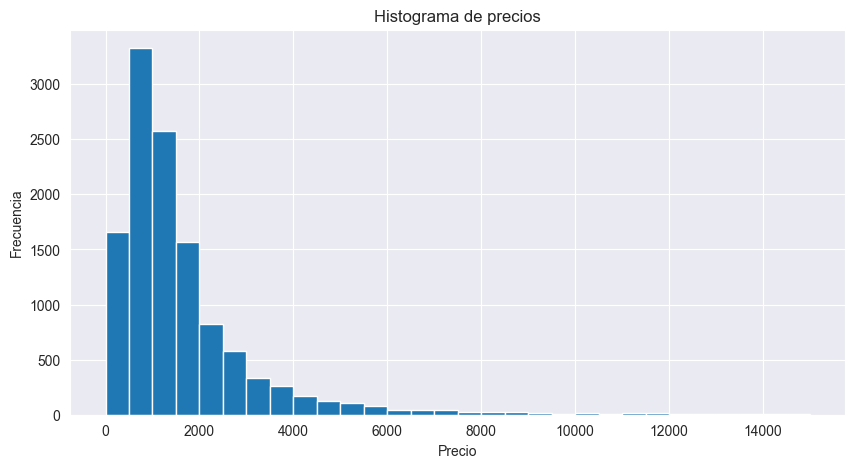

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=30, range=(0, 15000)) # Agregamos el rango para mostrar los principales precios
plt.title('Histograma de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Es importante mencionar que el histograma tiene un limite hasta 15,000 porque despues de ese valor no hay ni un solo dato hasta llegar al precio más alto 438,000

In [20]:
data['price']

2         585.0
4        1015.0
6        3982.0
7         327.0
8         605.0
          ...  
26058     846.0
26060     228.0
26061     448.0
26062     529.0
26065    1494.0
Name: price, Length: 11998, dtype: float64

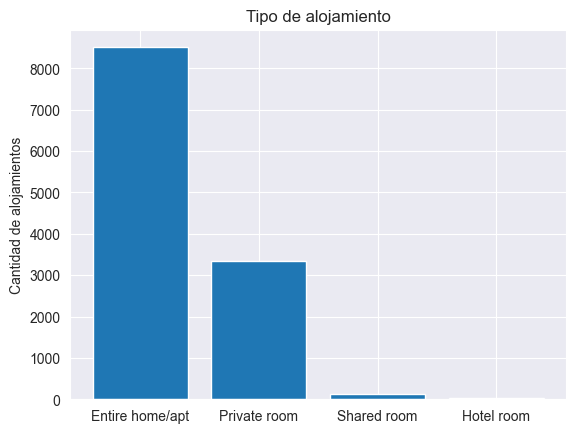

In [21]:
plt.figure()
plt.bar(data['room_type'].value_counts().head().index, data['room_type'].value_counts().head().values)
plt.title('Tipo de alojamiento')
plt.ylabel('Cantidad de alojamientos')
plt.show()

## Distribución geográfica de precios scatter_mapbox

In [22]:
import plotly.express as px

In [23]:
fig = px.scatter_map(data,
                        lon = data['longitude'],
                        lat = data['latitude'],
                        zoom = 10,
                        color = data['price'],
                        size = data['price'], #Cambia el tamño de los puntos de acuerdo con el precio
                        title = "Distribución geográfica de precios",
                        )

fig.show()

# Ejercicio: media, mediana y moda (25 de agosto de 2025)

Calcular las medias de tendencia central de todas las columnas que aplique.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 2 to 26065
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11998 non-null  int64  
 1   listing_url                                   11998 non-null  object 
 2   scrape_id                                     11998 non-null  int64  
 3   last_scraped                                  11998 non-null  object 
 4   source                                        11998 non-null  object 
 5   name                                          11998 non-null  object 
 6   description                                   11727 non-null  object 
 7   neighborhood_overview                         6872 non-null   object 
 8   picture_url                                   11998 non-null  object 
 9   host_id                                       11998 non-null  int6

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11998.0,6.384131e+17,5.440094e+17,5.607400e+04,3.926576e+07,7.914731e+17,1.150759e+18,1.379807e+18
scrape_id,11998.0,2.025032e+13,0.000000e+00,2.025032e+13,2.025032e+13,2.025032e+13,2.025032e+13,2.025032e+13
host_id,11998.0,2.063944e+08,1.966212e+08,1.224300e+04,4.010428e+07,1.292829e+08,3.592652e+08,6.844740e+08
host_listings_count,11998.0,4.108485e+01,1.179591e+02,1.000000e+00,2.000000e+00,8.000000e+00,2.600000e+01,8.860000e+02
host_total_listings_count,11998.0,5.661094e+01,1.679490e+02,1.000000e+00,3.000000e+00,9.000000e+00,3.300000e+01,1.049000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,11998.0,1.941019e+01,3.591966e-02,1.909576e+01,1.940305e+01,1.941797e+01,1.943285e+01,1.951744e+01
longitude,11998.0,-9.916817e+01,2.888067e-02,-9.932164e+01,-9.917883e+01,-9.916774e+01,-9.915569e+01,-9.897911e+01
accommodates,11998.0,3.554009e+00,2.533900e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,11994.0,1.516091e+00,1.193310e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.900000e+01


In [26]:
meanPrice = data['price'].mean()
medianaPrice = data['price'].median()
modePrice = data['price'].mode()

print(f"El precio promedio de una noche es: ${meanPrice.round(2)} \nLa mediana del precio es: ${medianaPrice}\nLa moda del precio es: ${modePrice}")

El precio promedio de una noche es: $1877.01 
La mediana del precio es: $1166.0
La moda del precio es: $0    900.0
Name: price, dtype: float64


In [27]:
meanBedrooms = data['bedrooms'].mean()
medianaBedrooms = data['bedrooms'].median()
modeBedrooms = data['bedrooms'].mode()

print(f"Habitaciones en promedio: {meanBedrooms.round(2)} \nMediana de habitaciones: {medianaBedrooms}\nModa de habitaciones: ${modeBedrooms}")

Habitaciones en promedio: 1.59 
Mediana de habitaciones: 1.0
Moda de habitaciones: $0    1.0
Name: bedrooms, dtype: float64


In [28]:
meanBeds = data['beds'].mean()
medianBeds = data['beds'].median()
modeBeds = data['beds'].mode()

print(f"Camas en promedio: {meanBeds.round(2)} \nMediana de camas: {medianBeds} \nModa de camas: {modeBeds}")

Camas en promedio: 2.04 
Mediana de camas: 2.0 
Moda de camas: 0    1.0
Name: beds, dtype: float64
